<h1 style="color: #FFA726;"><strong>Số lượng học sinh của các trung tâm theo vị trí địa lý</strong></h1>

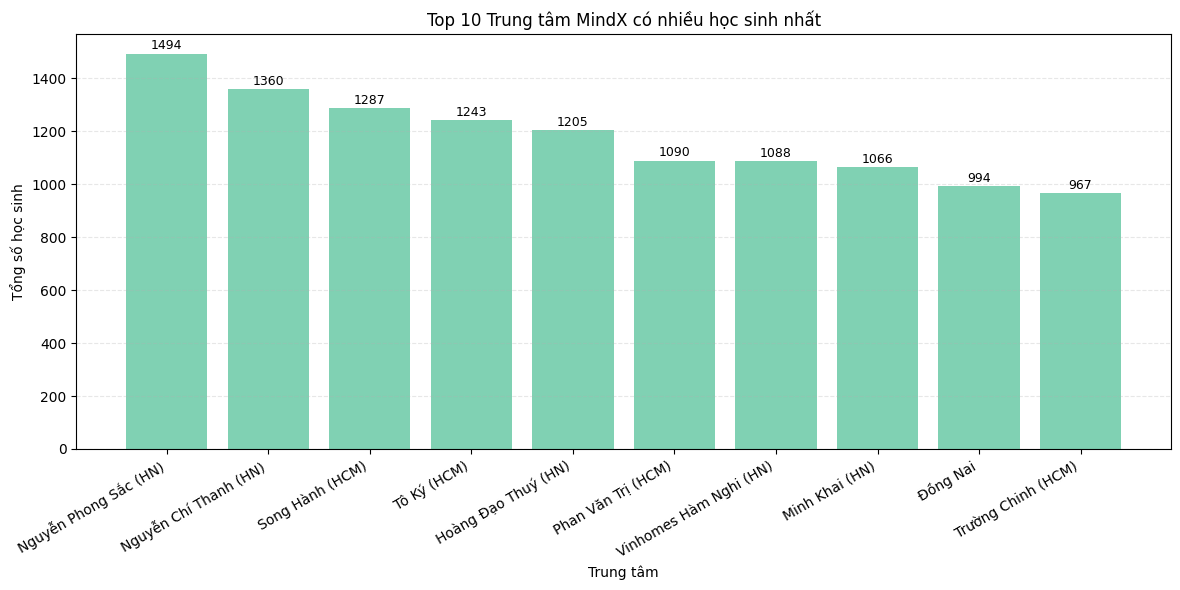

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_excel('k12_class_data.xlsx')

# Chuẩn hóa dữ liệu
df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)
df['Center'] = df['Center'].astype(str).str.strip().str.upper()

# Lọc theo trạng thái cần thiết
df_filtered = df[df['Status'].isin(['FINISHED', 'PENDING', 'OPEN', 'RUNNING'])]
df_filtered = df_filtered[~df_filtered['Center'].isin(['DART', 'HCM-ONLINE'])]

# Tổng hợp theo trung tâm
summary = (
    df_filtered
    .groupby('Center')
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
    .sort_values('total_students', ascending=False)
    .head(10)
)

center_map = {
    '29T1HDT': 'Hoàng Đạo Thuý (HN)',
    '25LB':    'Long Biên (HN)',
    '10TP':    'Trần Phú (HN)',
    '505MK':   'Minh Khai (HN)',
    '71NCT':   'Nguyễn Chí Thanh (HN)',
    '06NHT': 'Nguyễn Hữu Thọ (HN)',
    '107NPS': 'Nguyễn Phong Sắc (HN)',
    '98NVC': 'Nguyễn Văn Cừ (HN)',
    'KĐT VP': 'KĐT Văn Phú (HN)',
    'VHHN': 'Vinhomes Hàm Nghi (HN)',
    '22CTC': 'Thành Công (HN)',
    '176DC': 'Định Công (HN)',
    '672A28PVT': 'Phan Văn Trị (HCM)',
    '01TC': 'Trường Chinh (HCM)',
    '02SH': 'Song Hành (HCM)',
    '223NX': 'Nguyễn Xí (HCM)',
    '01QT': 'Quang Trung (HCM)',
    '261-263PXL': 'Phan Xích Long (HCM)',
    '165-167NTT': 'Nguyễn Thị Thập (HCM)',
    '01TK': 'Tô Ký (HCM)',
    '6183/2': '3 tháng 2 (HCM)',
    '490 PTB': 'Phạm Thái Bường (HCM)',
    '120-122PVĐ': 'Phạm Văn Đồng (HCM)',
    '174TL': 'Tên Lửa (HCM)',
    '322TT': 'Tây Thạnh (HCM)',
    '39HTLO': 'Hải Thượng Lãn Ông (HCM)',
    '343PNL': 'Phạm Ngũ Lão (HCM)',
    '99LVV': 'Lê Văn Việt (HCM)',
    '414LBB': 'Luỹ Bán Bích (HCM)',
    '624LLQ': 'Lạc Long Quân (HCM)',
    '22-24UVK': 'Ung Văn Khiêm (HCM)',
    '205ALHP': 'Vũng Tàu',
    '01TP': 'Vĩnh Phúc',
    'DLLL': 'Thanh Hóa',
    '04HVT': 'Thái Nguyễn',
    '70NVC': 'Quảng Ninh', 
    '1606AHV': 'Phú Thọ',
    '67ĐLLN': 'Nghệ An',
    '268TNH': 'Hải Phòng',
    '253PVT': 'Đồng Nai',
    '255-257HV': 'Đà Nẵng',
    '153QTHD': 'Cần Thơ',
    '76NAN': 'Dĩ An Bình Dương (BD)',
    '230ĐLBD': '230 Đại Lộ Bình Dương (BD)',
    '299LTT': 'Bắc Ninh',
    'CTPB': 'Các tỉnh phía Bắc',
    'CTPN': 'Các tỉnh phía Nam',
    'HCM-Online': 'HCM Online',
    'HN-ONLINE':  'HN Online',
    'DArt':       'Digital Art Online',
    'NPS': 'Nguyễn Phong Sắc (HN)',
    'NCT': 'Nguyễn Chí Thanh (HN)',
    'TK': 'Tô Ký (HCM)',
    'SH': 'Song Hành (HCM)',
    'MK': 'Minh Khai (HN)',
    'BH': 'Bắc Hà (HN)',
    'HDT': 'Hoàng Đạo Thuý (HN)',
    'ONL': 'Online',
    'PVT': 'Đồng Nai',
}
course_line_map = {
    'AD':   'Art & Design',
    'ROB':  'Robotics',
    'C4K':  'Code for Kids',
    'C4T':  'Code for Teens',
}
summary['Center Name'] = summary['Center'].map(center_map).fillna(summary['Center'])

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
bars = plt.bar(summary['Center Name'], summary['total_students'], color='#80d1b3')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Trung tâm')
plt.ylabel('Tổng số học sinh')
plt.title('Top 10 Trung tâm MindX có nhiều học sinh nhất')

# Ghi số lên từng cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Biểu đồ cho thấy các trung tâm lớn tại Hà Nội và TP.HCM như Nguyễn Phong Sắc, Song Hành, Tô Ký, Quang Trung có số lượng học sinh vượt trội so với các trung tâm ở tỉnh lẻ hoặc khu vực ngoại ô. Điều này phản ánh sự tập trung dân cư, mức độ nhận diện thương hiệu và nhu cầu học tập cao tại các thành phố lớn. Ngược lại, các trung tâm ở tỉnh/thành phố nhỏ có số lượng học sinh thấp hơn.
</p>

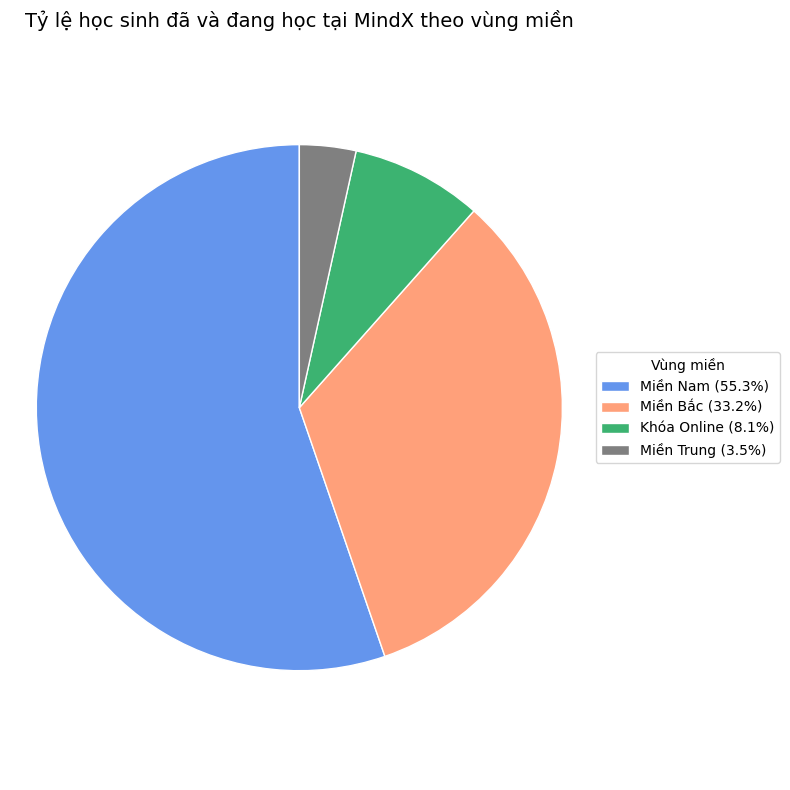

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('k12_class_data.xlsx')
df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)
df_finish = df[df['Status'].isin(['FINISHED', 'PENDING', 'OPEN', 'RUNNING'])].copy()

# Hàm phân loại miền theo mã trung tâm
def map_region(center_code):
    name = str(center_code)
    if name in ['29T1HDT', '25LB', '10TP', 'CTPB', '505MK', '71NCT', '06NHT', '107NPS', '98NVC', 'KĐT VP', 'VHHN', '22CTC', '176DC', '01TP',  '04HVT', '70NVC', '1606AHV', '268TNH']:
        return 'Miền Bắc'
    elif name in ['672A28PVT', '01TC', '02SH', '223NX', '01QT', 'CTPN', '261-263PXL', '165-167NTT', '01TK', '6183/2', '490 PTB', '120-122PVĐ', '174TL', '322TT', '39HTLO', '343PNL', '99LVV', '414LBB', '624LLQ', '22-24UVK', '205ALHP', '153QTHD', '76NAN', '230ĐLBD', '253PVT', '299LTT']:
        return 'Miền Nam'
    elif name in ['DLLL', '67ĐLLN','255-257HV' ]:
        return 'Miền Trung'
    elif name in ['HCM-Online', 'DArt', 'HN-ONLINE']:
        return 'Khóa Online'
    else:
        return 'Không xác định'

df_finish['Region'] = df_finish['Center'].apply(map_region)

# Tổng hợp số học sinh theo miền
region_summary = (
    df_finish
    .groupby('Region')
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
    .sort_values('total_students', ascending=False)
)

percent = (region_summary['total_students'] / region_summary['total_students'].sum() * 100).round(1)
legend_labels = [f'{r} ({p}%)' for r, p in zip(region_summary['Region'], percent)]

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['cornflowerblue', 'lightsalmon', 'mediumseagreen', 'gray']
wedges, _ = ax.pie(
    region_summary['total_students'],
    labels=None,
    startangle=90,
    colors=colors[:len(region_summary)],
    wedgeprops={'edgecolor': 'white'}
)

ax.legend(
    wedges,
    legend_labels,
    title='Vùng miền',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

ax.set_title('Tỷ lệ học sinh đã và đang học tại MindX theo vùng miền', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Miền Nam là khu vực có tỷ lệ học sinh cao nhất, tiếp theo là miền Bắc, miền Trung và cuối cùng là các khóa online. Nguyên nhân có thể do các cơ sở ở miền Nam dễ tiếp cận hơn, nhu cầu học lập trình và công nghệ tại đây lớn, phụ huynh cũng có xu hướng cho con học kỹ năng mềm sớm hơn.
</p>

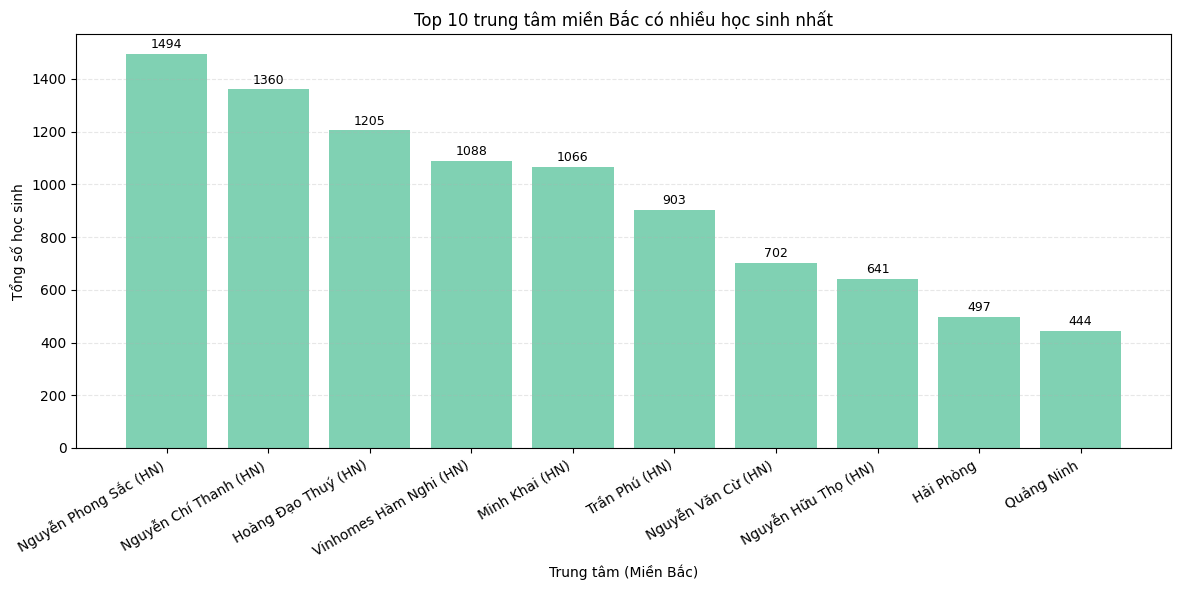

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_excel('k12_class_data.xlsx')



# Chuẩn hóa dữ liệu
df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)

center_map = {
    '29T1HDT': 'Hoàng Đạo Thuý (HN)',
    '25LB':    'Long Biên (HN)',
    '10TP':    'Trần Phú (HN)',
    '505MK':   'Minh Khai (HN)',
    '71NCT':   'Nguyễn Chí Thanh (HN)',
    '06NHT': 'Nguyễn Hữu Thọ (HN)',
    '107NPS': 'Nguyễn Phong Sắc (HN)',
    '98NVC': 'Nguyễn Văn Cừ (HN)',
    'KĐT VP': 'KĐT Văn Phú (HN)',
    'VHHN': 'Vinhomes Hàm Nghi (HN)',
    '22CTC': 'Thành Công (HN)',
    '176DC': 'Định Công (HN)',
    '672A28PVT': 'Phan Văn Trị (HCM)',
    '01TC': 'Trường Chinh (HCM)',
    '02SH': 'Song Hành (HCM)',
    '223NX': 'Nguyễn Xí (HCM)',
    '01QT': 'Quang Trung (HCM)',
    '261-263PXL': 'Phan Xích Long (HCM)',
    '165-167NTT': 'Nguyễn Thị Thập (HCM)',
    '01TK': 'Tô Ký (HCM)',
    '6183/2': '3 tháng 2 (HCM)',
    '490 PTB': 'Phạm Thái Bường (HCM)',
    '120-122PVĐ': 'Phạm Văn Đồng (HCM)',
    '174TL': 'Tên Lửa (HCM)',
    '322TT': 'Tây Thạnh (HCM)',
    '39HTLO': 'Hải Thượng Lãn Ông (HCM)',
    '343PNL': 'Phạm Ngũ Lão (HCM)',
    '99LVV': 'Lê Văn Việt (HCM)',
    '414LBB': 'Luỹ Bán Bích (HCM)',
    '624LLQ': 'Lạc Long Quân (HCM)',
    '22-24UVK': 'Ung Văn Khiêm (HCM)',
    '205ALHP': 'Vũng Tàu',
    '01TP': 'Vĩnh Phúc',
    'DLLL': 'Thanh Hóa',
    '04HVT': 'Thái Nguyễn',
    '70NVC': 'Quảng Ninh', 
    '1606AHV': 'Phú Thọ',
    '67ĐLLN': 'Nghệ An',
    '268TNH': 'Hải Phòng',
    '253PVT': 'Đồng Nai',
    '255-257HV': 'Đà Nẵng',
    '153QTHD': 'Cần Thơ',
    '76NAN': 'Dĩ An Bình Dương (BD)',
    '230ĐLBD': '230 Đại Lộ Bình Dương (BD)',
    '299LTT': 'Bắc Ninh',
    'CTPB': 'Các tỉnh phía Bắc',
    'CTPN': 'Các tỉnh phía Nam',
    'HCM-Online': 'HCM Online',
    'HN-ONLINE':  'HN Online',
    'DArt':       'Digital Art Online',
    'NPS': 'Nguyễn Phong Sắc (HN)',
    'NCT': 'Nguyễn Chí Thanh (HN)',
    'TK': 'Tô Ký (HCM)',
    'SH': 'Song Hành (HCM)',
    'MK': 'Minh Khai (HN)',
    'BH': 'Bắc Hà (HN)',
    'HDT': 'Hoàng Đạo Thuý (HN)',
    'ONL': 'Online',
}
course_line_map = {
    'AD':   'Art & Design',
    'ROB':  'Robotics',
    'C4K':  'Code for Kids',
    'C4T':  'Code for Teens',
}

df_filtered = df[df['Status'].isin(['FINISHED', 'PENDING', 'OPEN', 'RUNNING'])].copy()


# Hàm phân loại miền
def map_region(center_code):
    name = str(center_code)
    if name in ['29T1HDT', '25LB', '10TP', 'CTPB', '505MK', '71NCT', '06NHT', '107NPS', '98NVC', 'KĐT VP', 'VHHN', '22CTC', '176DC', '01TP',  '04HVT', '70NVC', '1606AHV', '268TNH']:
        return 'Miền Bắc'
    elif name in ['672A28PVT', '01TC', '02SH', '223NX', '01QT', 'CTPN', '261-263PXL', '165-167NTT', '01TK', '6183/2', '490 PTB', '120-122PVĐ', '174TL', '322TT', '39HTLO', '343PNL', '99LVV', '414LBB', '624LLQ', '22-24UVK', '205ALHP', '153QTHD', '76NAN', '230ĐLBD', '253PVT', '299LTT']:
        return 'Miền Nam'
    elif name in ['DLLL', '67ĐLLN','255-257HV' ]:
        return 'Miền Trung'
    elif name in ['HCM-Online', 'DArt', 'HN-ONLINE']:
        return 'Khóa Online'
    else:
        return 'Không xác định'

df_filtered['Region'] = df_filtered['Center'].apply(map_region)
df_filtered['Center'] = df_filtered['Center'].astype(str).str.strip().str.upper()
df_filtered['Center'] = df_filtered['Center'].map(center_map).fillna(df_filtered['Center'])

df_north = df_filtered[df_filtered['Region'] == 'Miền Bắc']
df['Center'] = df['Center'].astype(str).str.strip().str.upper()
df['Center'] = df['Center'].map(center_map).fillna(df['Center'])

top_north = (
    df_north
    .groupby('Center')
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
    .sort_values('total_students', ascending=False)
    .head(10)
)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_north['Center'], top_north['total_students'], color='#80d1b3')
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.xlabel('Trung tâm (Miền Bắc)')
plt.ylabel('Tổng số học sinh')
plt.title('Top 10 trung tâm miền Bắc có nhiều học sinh nhất')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Biểu đồ thể hiện số lượng học sinh K12 tại các trung tâm miền Bắc tập trung chủ yếu ở các cơ sở nằm trên các tuyến phố lớn và khu vực trung tâm Hà Nội như Nguyễn Phong Sắc, Nguyễn Chí Thanh, Hoàng Đạo Thuý. Những trung tâm này có vị trí thuận lợi, dễ tiếp cận. Các trung tâm ở tỉnh lẻ hoặc ngoại ô thường có số lượng học sinh thấp hơn, cho thấy sự chênh lệch rõ rệt về nhu cầu học tập giữa các khu vực.
</p>

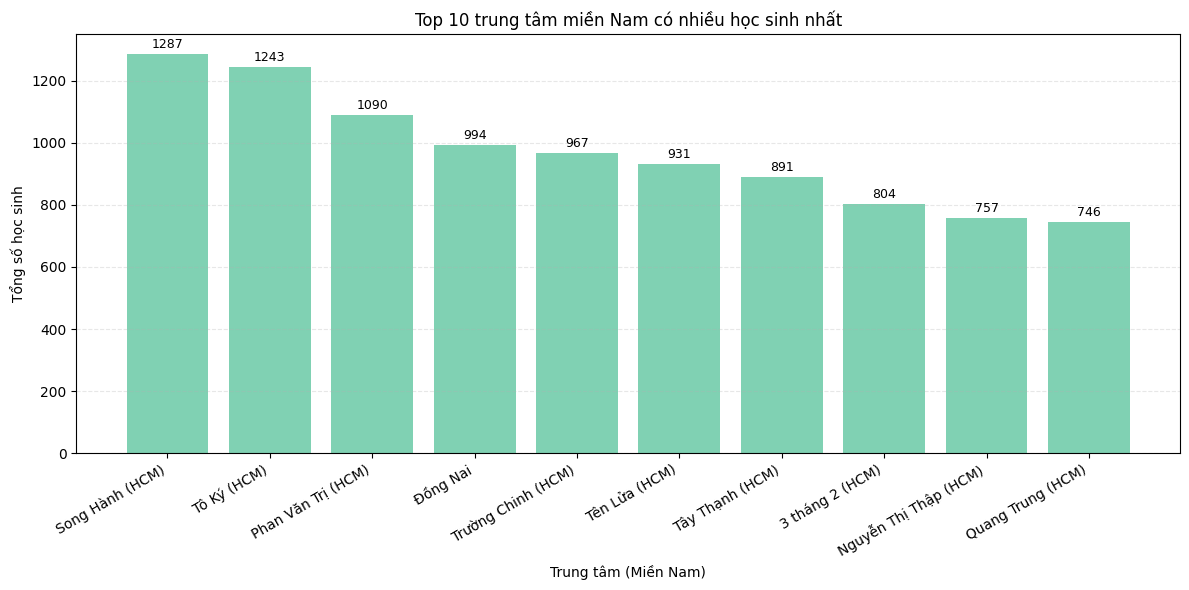

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('k12_class_data.xlsx')
df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)

center_map = {
    '29T1HDT': 'Hoàng Đạo Thuý (HN)',
    '25LB':    'Long Biên (HN)',
    '10TP':    'Trần Phú (HN)',
    '505MK':   'Minh Khai (HN)',
    '71NCT':   'Nguyễn Chí Thanh (HN)',
    '06NHT': 'Nguyễn Hữu Thọ (HN)',
    '107NPS': 'Nguyễn Phong Sắc (HN)',
    '98NVC': 'Nguyễn Văn Cừ (HN)',
    'KĐT VP': 'KĐT Văn Phú (HN)',
    'VHHN': 'Vinhomes Hàm Nghi (HN)',
    '22CTC': 'Thành Công (HN)',
    '176DC': 'Định Công (HN)',
    '672A28PVT': 'Phan Văn Trị (HCM)',
    '01TC': 'Trường Chinh (HCM)',
    '02SH': 'Song Hành (HCM)',
    '223NX': 'Nguyễn Xí (HCM)',
    '01QT': 'Quang Trung (HCM)',
    '261-263PXL': 'Phan Xích Long (HCM)',
    '165-167NTT': 'Nguyễn Thị Thập (HCM)',
    '01TK': 'Tô Ký (HCM)',
    '6183/2': '3 tháng 2 (HCM)',
    '490 PTB': 'Phạm Thái Bường (HCM)',
    '120-122PVĐ': 'Phạm Văn Đồng (HCM)',
    '174TL': 'Tên Lửa (HCM)',
    '322TT': 'Tây Thạnh (HCM)',
    '39HTLO': 'Hải Thượng Lãn Ông (HCM)',
    '343PNL': 'Phạm Ngũ Lão (HCM)',
    '99LVV': 'Lê Văn Việt (HCM)',
    '414LBB': 'Luỹ Bán Bích (HCM)',
    '624LLQ': 'Lạc Long Quân (HCM)',
    '22-24UVK': 'Ung Văn Khiêm (HCM)',
    '205ALHP': 'Vũng Tàu',
    '01TP': 'Vĩnh Phúc',
    'DLLL': 'Thanh Hóa',
    '04HVT': 'Thái Nguyễn',
    '70NVC': 'Quảng Ninh', 
    '1606AHV': 'Phú Thọ',
    '67ĐLLN': 'Nghệ An',
    '268TNH': 'Hải Phòng',
    '253PVT': 'Đồng Nai',
    '255-257HV': 'Đà Nẵng',
    '153QTHD': 'Cần Thơ',
    '76NAN': 'Dĩ An Bình Dương (BD)',
    '230ĐLBD': '230 Đại Lộ Bình Dương (BD)',
    '299LTT': 'Bắc Ninh',
    'CTPB': 'Các tỉnh phía Bắc',
    'CTPN': 'Các tỉnh phía Nam',
    'HCM-Online': 'HCM Online',
    'HN-ONLINE':  'HN Online',
    'DArt':       'Digital Art Online',
    'NPS': 'Nguyễn Phong Sắc (HN)',
    'NCT': 'Nguyễn Chí Thanh (HN)',
    'TK': 'Tô Ký (HCM)',
    'SH': 'Song Hành (HCM)',
    'MK': 'Minh Khai (HN)',
    'BH': 'Bắc Hà (HN)',
    'HDT': 'Hoàng Đạo Thuý (HN)',
    'ONL': 'Online',
}
course_line_map = {
    'AD':   'Art & Design',
    'ROB':  'Robotics',
    'C4K':  'Code for Kids',
    'C4T':  'Code for Teens',
}

df_filtered = df[df['Status'].isin(['FINISHED', 'PENDING', 'OPEN', 'RUNNING'])].copy()


# Hàm phân loại miền
def map_region(center_code):
    name = str(center_code)
    if name in ['29T1HDT', '25LB', '10TP', 'CTPB', '505MK', '71NCT', '06NHT', '107NPS', '98NVC', 'KĐT VP', 'VHHN', '22CTC', '176DC', '01TP',  '04HVT', '70NVC', '1606AHV', '268TNH']:
        return 'Miền Bắc'
    elif name in ['672A28PVT', '01TC', '02SH', '223NX', '01QT', 'CTPN', '261-263PXL', '165-167NTT', '01TK', '6183/2', '490 PTB', '120-122PVĐ', '174TL', '322TT', '39HTLO', '343PNL', '99LVV', '414LBB', '624LLQ', '22-24UVK', '205ALHP', '153QTHD', '76NAN', '230ĐLBD', '253PVT', '299LTT']:
        return 'Miền Nam'
    elif name in ['DLLL', '67ĐLLN','255-257HV' ]:
        return 'Miền Trung'
    elif name in ['HCM-Online', 'DArt', 'HN-ONLINE']:
        return 'Khóa Online'
    else:
        return 'Không xác định'

df_filtered['Region'] = df_filtered['Center'].apply(map_region)
df_filtered['Center'] = df_filtered['Center'].astype(str).str.strip().str.upper()
df_filtered['Center'] = df_filtered['Center'].map(center_map).fillna(df_filtered['Center'])

df_north = df_filtered[df_filtered['Region'] == 'Miền Nam']
df['Center'] = df['Center'].astype(str).str.strip().str.upper()
df['Center'] = df['Center'].map(center_map).fillna(df['Center'])

top_north = (
    df_north
    .groupby('Center')
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
    .sort_values('total_students', ascending=False)
    .head(10)
)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_north['Center'], top_north['total_students'], color='#80d1b3')
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.xlabel('Trung tâm (Miền Nam)')
plt.ylabel('Tổng số học sinh')
plt.title('Top 10 trung tâm miền Nam có nhiều học sinh nhất')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Ở TP.HCM, các trung tâm gần khu đô thị lớn, nơi có nhiều gia đình có điều kiện như Song Hành, Tô Ký có số lượng học sinh nổi bật. Ngoài ra, các trung tâm ở các tỉnh lân cận như Đồng Nai cũng có số học sinh tương đối cao so với các cơ sở khác trong thành phố.
</p>

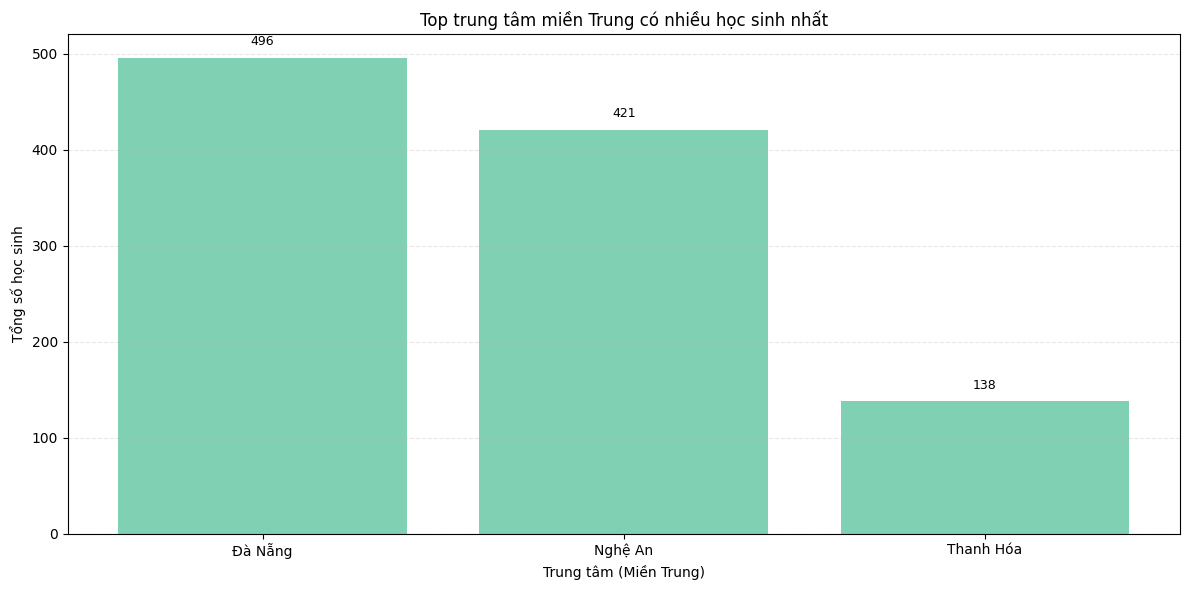

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('k12_class_data.xlsx')

df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)

center_map = {
    '29T1HDT': 'Hoàng Đạo Thuý (HN)',
    '25LB':    'Long Biên (HN)',
    '10TP':    'Trần Phú (HN)',
    '505MK':   'Minh Khai (HN)',
    '71NCT':   'Nguyễn Chí Thanh (HN)',
    '06NHT': 'Nguyễn Hữu Thọ (HN)',
    '107NPS': 'Nguyễn Phong Sắc (HN)',
    '98NVC': 'Nguyễn Văn Cừ (HN)',
    'KĐT VP': 'KĐT Văn Phú (HN)',
    'VHHN': 'Vinhomes Hàm Nghi (HN)',
    '22CTC': 'Thành Công (HN)',
    '176DC': 'Định Công (HN)',
    '672A28PVT': 'Phan Văn Trị (HCM)',
    '01TC': 'Trường Chinh (HCM)',
    '02SH': 'Song Hành (HCM)',
    '223NX': 'Nguyễn Xí (HCM)',
    '01QT': 'Quang Trung (HCM)',
    '261-263PXL': 'Phan Xích Long (HCM)',
    '165-167NTT': 'Nguyễn Thị Thập (HCM)',
    '01TK': 'Tô Ký (HCM)',
    '6183/2': '3 tháng 2 (HCM)',
    '490 PTB': 'Phạm Thái Bường (HCM)',
    '120-122PVĐ': 'Phạm Văn Đồng (HCM)',
    '174TL': 'Tên Lửa (HCM)',
    '322TT': 'Tây Thạnh (HCM)',
    '39HTLO': 'Hải Thượng Lãn Ông (HCM)',
    '343PNL': 'Phạm Ngũ Lão (HCM)',
    '99LVV': 'Lê Văn Việt (HCM)',
    '414LBB': 'Luỹ Bán Bích (HCM)',
    '624LLQ': 'Lạc Long Quân (HCM)',
    '22-24UVK': 'Ung Văn Khiêm (HCM)',
    '205ALHP': 'Vũng Tàu',
    '01TP': 'Vĩnh Phúc',
    'DLLL': 'Thanh Hóa',
    '04HVT': 'Thái Nguyễn',
    '70NVC': 'Quảng Ninh', 
    '1606AHV': 'Phú Thọ',
    '67ĐLLN': 'Nghệ An',
    '268TNH': 'Hải Phòng',
    '253PVT': 'Đồng Nai',
    '255-257HV': 'Đà Nẵng',
    '153QTHD': 'Cần Thơ',
    '76NAN': 'Dĩ An Bình Dương (BD)',
    '230ĐLBD': '230 Đại Lộ Bình Dương (BD)',
    '299LTT': 'Bắc Ninh',
    'CTPB': 'Các tỉnh phía Bắc',
    'CTPN': 'Các tỉnh phía Nam',
    'HCM-Online': 'HCM Online',
    'HN-ONLINE':  'HN Online',
    'DArt':       'Digital Art Online',
    'NPS': 'Nguyễn Phong Sắc (HN)',
    'NCT': 'Nguyễn Chí Thanh (HN)',
    'TK': 'Tô Ký (HCM)',
    'SH': 'Song Hành (HCM)',
    'MK': 'Minh Khai (HN)',
    'BH': 'Bắc Hà (HN)',
    'HDT': 'Hoàng Đạo Thuý (HN)',
    'ONL': 'Online',
    'DART': 'Digital Art Online',
    'HCM-ONLINE': 'HCM Online',
    'HN-ONLINE': 'HN Online',
}
course_line_map = {
    'AD':   'Art & Design',
    'ROB':  'Robotics',
    'C4K':  'Code for Kids',
    'C4T':  'Code for Teens',
}

df_filtered = df[df['Status'].isin(['FINISHED', 'PENDING', 'OPEN', 'RUNNING'])].copy()

def map_region(center_code):
    name = str(center_code)
    if name in ['29T1HDT', '25LB', '10TP', 'CTPB', '505MK', '71NCT', '06NHT', '107NPS', '98NVC', 'KĐT VP', 'VHHN', '22CTC', '176DC', '01TP',  '04HVT', '70NVC', '1606AHV', '268TNH']:
        return 'Miền Bắc'
    elif name in ['672A28PVT', '01TC', '02SH', '223NX', '01QT', 'CTPN', '261-263PXL', '165-167NTT', '01TK', '6183/2', '490 PTB', '120-122PVĐ', '174TL', '322TT', '39HTLO', '343PNL', '99LVV', '414LBB', '624LLQ', '22-24UVK', '205ALHP', '153QTHD', '76NAN', '230ĐLBD', '253PVT', '299LTT']:
        return 'Miền Nam'
    elif name in ['DLLL', '67ĐLLN','255-257HV' ]:
        return 'Miền Trung'
    elif name in ['HCM-Online', 'DArt', 'HN-ONLINE']:
        return 'Khóa Online'
    else:
        return 'Không xác định'

df_filtered['Region'] = df_filtered['Center'].apply(map_region)
df_filtered['Center'] = df_filtered['Center'].astype(str).str.strip().str.upper()
df_filtered['Center'] = df_filtered['Center'].map(center_map).fillna(df_filtered['Center'])

df_north = df_filtered[df_filtered['Region'] == 'Miền Trung']
df['Center'] = df['Center'].astype(str).str.strip().str.upper()
df['Center'] = df['Center'].map(center_map).fillna(df['Center'])
top_north = (
    df_north
    .groupby('Center')
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
    .sort_values('total_students', ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_north['Center'], top_north['total_students'], color='#80d1b3')
plt.xticks(rotation=0, fontsize=10)
plt.xlabel('Trung tâm (Miền Trung)')
plt.ylabel('Tổng số học sinh')
plt.title('Top trung tâm miền Trung có nhiều học sinh nhất')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Miền Trung có số lượng trung tâm và học sinh ít hơn hai miền còn lại. Tuy nhiên, các trung tâm lớn như Đà Nẵng, Nghệ An vẫn có số lượng học sinh nổi bật, chủ yếu tập trung ở các lộ trình phổ biến. Điều này cho thấy tiềm năng phát triển của khu vực này trong tương lai.
</p>

<h2 style="color: #E64A19;"><strong>Kết luận:</strong></h2>
<p>
Qua các biểu đồ, có thể thấy sự phân bố học sinh giữa các trung tâm và vùng miền chưa đồng đều. Miền Nam đang dẫn đầu về số lượng học sinh, trong khi miền Trung còn nhiều tiềm năng phát triển. Để cân bằng số lượng học sinh giữa các trung tâm, MindX nên tiếp tục mở rộng các khóa học online, tăng cường quảng bá và đầu tư vào các trung tâm tại miền Trung, đồng thời duy trì chất lượng và đa dạng hóa chương trình đào tạo tại các trung tâm lớn ở Hà Nội và TP.HCM.
</p>

<h1 style="color: #FFA726;"><strong>Số học sinh theo loại hình học tập</strong></h1>

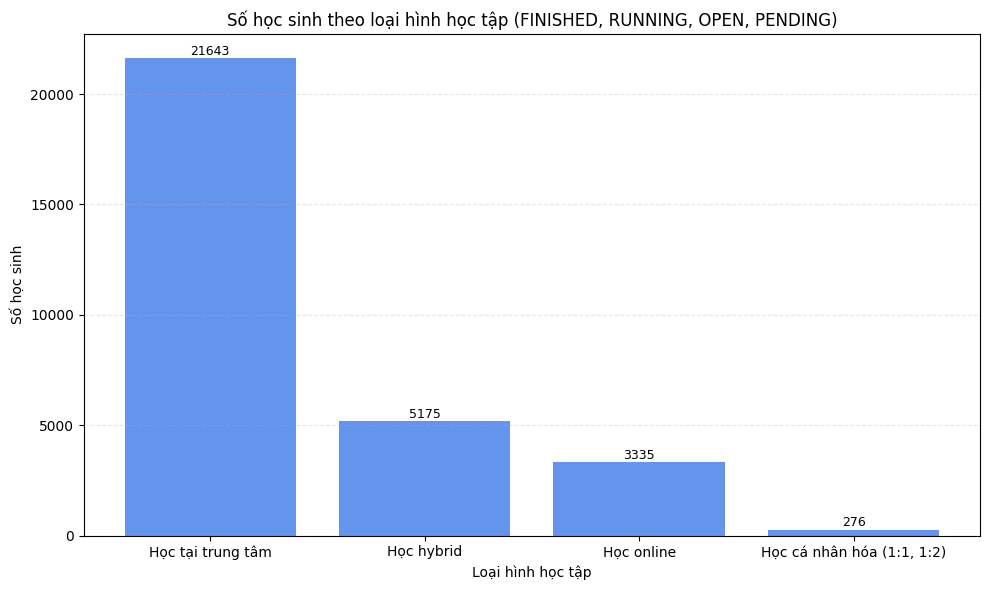

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_excel('k12_class_data.xlsx')

# Hàm phân loại miền
def map_region(center_code):
    name = str(center_code).upper()

    if re.match(r'^ONL-', name):
        return 'Khác'

    north_centers = ['29T1HDT', '25LB', '10TP', 'CTPB', '505MK', '71NCT', '06NHT',
                     '107NPS', '98NVC', 'KĐT VP', 'VHHN', '22CTC', '176DC', '01TP',
                     '04HVT', '70NVC', '1606AHV', '268TNH' , 'HN-ONLINE', 'DArt']
    south_centers = ['672A28PVT', '01TC', '02SH', '223NX', '01QT', 'CTPN', '261-263PXL',
                     '165-167NTT', '01TK', '6183/2', '490 PTB', '120-122PVĐ', '174TL',
                     '322TT', '39HTLO', '343PNL', '99LVV', '414LBB', '624LLQ',
                     '22-24UVK', '205ALHP', '153QTHD', '76NAN', '230ĐLBD',
                     '253PVT', '299LTT', 'HCM-ONLINE', 'DArt']
    other_centers = ['DLLL', '67ĐLLN','255-257HV', 'DArt']

    if name in north_centers:
        return 'Miền Bắc'
    elif name in south_centers:
        return 'Miền Nam'
    elif name in other_centers:
        return 'Miền Trung'
    else:
        return 'Không xác định'


# Hàm nhận diện loại hình lớp học
def detect_class_type(name):
    name = str(name).upper()

    if 'ONLINE' in name or 'ONL' in name:
        return 'Học online'
    elif 'HYBRID' in name or 'HB' in name:
        return 'Học hybrid'
    elif '1:1' in name or '1:2' in name or '1:3' in name:
        return 'Học cá nhân hóa (1:1, 1:2)'
    
    match = re.search(r'\(([^)]+)\)', name)
    if match:
        return match.group(1).strip()
    
    return 'Học tại trung tâm'
df['Class Type'] = df['Class name'].apply(detect_class_type)
class_type_map = {
    'Offline': 'Học tại trung tâm',
    'ONLINE':  'Học online',
    'ONL':     'Học online',
    'HB':      'Học hybrid',
    '1:1':     'Học cá nhân hóa (1:1, 1:2)',
    '1:2': 'Học cá nhân hóa (1:1, 1:2)',
    '1:3': 'Học cá nhân hóa (1:1, 1:2)',
}
df['Class Type Name'] = df['Class Type'].map(class_type_map).fillna(df['Class Type'])
df['Status'] = df['Status'].astype(str).str.upper()
valid_statuses = ['FINISHED', 'PENDING', 'OPEN', 'RUNNING']
df_filtered = df[df['Status'].isin(valid_statuses)].copy()
df_filtered['Student count'] = pd.to_numeric(df_filtered['Student count'], errors='coerce').fillna(0).astype(int)
group_type = (
    df_filtered
    .groupby('Class Type Name')
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
    .sort_values('total_students', ascending=False)
)
plt.figure(figsize=(10, 6))
bars = plt.bar(group_type['Class Type Name'], group_type['total_students'], color='cornflowerblue')
plt.xticks
plt.xlabel('Loại hình học tập')
plt.ylabel('Số học sinh')
plt.title('Số học sinh theo loại hình học tập (FINISHED, RUNNING, OPEN, PENDING)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Phần lớn học sinh MindX chọn học tại trung tâm (offline), cho thấy hình thức này vẫn là ưu tiên nhờ môi trường học tập trực tiếp và sự tương tác cao. Loại hình hybrid (kết hợp online và offline) và học online hoàn toàn cũng có số lượng đáng kể, phản ánh xu hướng linh hoạt và tiện lợi trong học tập. Các lớp cá nhân hóa (1:1, 1:2) chiếm tỷ lệ nhỏ, chủ yếu phục vụ nhu cầu đặc biệt hoặc ở khu vực chưa có trung tâm.
</p>

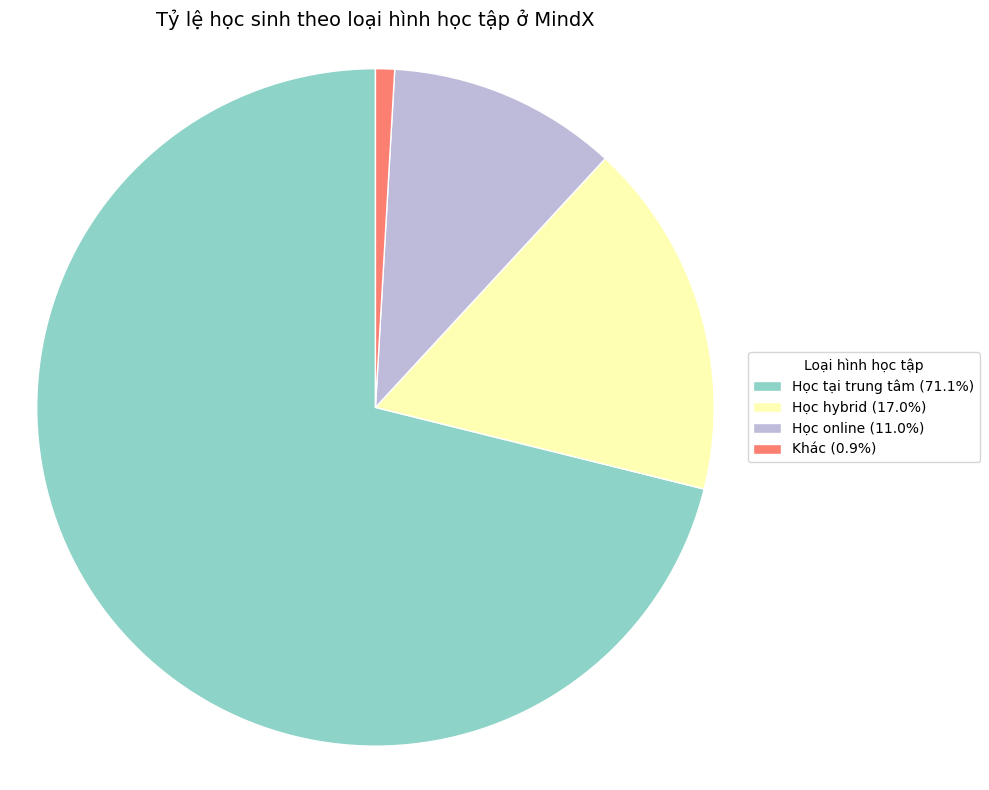

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_excel('k12_class_data.xlsx')

# Hàm phân loại miền
def map_region(center_code):
    name = str(center_code).upper()

    if re.match(r'^ONL-', name):
        return 'Khác'

    north_centers = ['29T1HDT', '25LB', '10TP', 'CTPB', '505MK', '71NCT', '06NHT',
                     '107NPS', '98NVC', 'KĐT VP', 'VHHN', '22CTC', '176DC', '01TP',
                     '04HVT', '70NVC', '1606AHV', '268TNH' , 'HN-ONLINE', 'DArt']
    south_centers = ['672A28PVT', '01TC', '02SH', '223NX', '01QT', 'CTPN', '261-263PXL',
                     '165-167NTT', '01TK', '6183/2', '490 PTB', '120-122PVĐ', '174TL',
                     '322TT', '39HTLO', '343PNL', '99LVV', '414LBB', '624LLQ',
                     '22-24UVK', '205ALHP', '153QTHD', '76NAN', '230ĐLBD',
                     '253PVT', '299LTT', 'HCM-ONLINE', 'DArt']
    other_centers = ['DLLL', '67ĐLLN','255-257HV', 'DArt']

    if name in north_centers:
        return 'Miền Bắc'
    elif name in south_centers:
        return 'Miền Nam'
    elif name in other_centers:
        return 'Miền Trung'
    else:
        return 'Không xác định'

df_filtered['Region'] = df_filtered['Center'].apply(map_region)

# Hàm nhận diện loại hình lớp học
def detect_class_type(name):
    name = str(name).upper()

    if 'ONLINE' in name or 'ONL' in name:
        return 'Học online'
    elif 'HYBRID' in name or 'HB' in name:
        return 'Học hybrid'
    elif '1:1' in name or '1:2' in name or '1:3' in name:
        return 'Khác'
    
    match = re.search(r'\(([^)]+)\)', name)
    if match:
        return match.group(1).strip()
    
    return 'Học tại trung tâm'

df['Class Type'] = df['Class name'].apply(detect_class_type)
# Mapping tên hiển thị
class_type_map = {
    'Offline': 'Học tại trung tâm',
    'OFF': 'Học tại trung tâm',
    'OFFLINE': 'Học tại trung tâm',
    'Online':  'Học online',
    'Onl': 'Học online',
    'ONLINE':  'Học online',
    'ONL':     'Học online',
    'HB':      'Học hybrid',
    '1:1':     'Khác',
    '1:2':     'Khác',
    'Ver2': 'Khác',
    '1:3': 'Khác',
    'S': 'Khác',
    'P': 'Khác',
}
df['Class Type Name'] = df['Class Type'].map(class_type_map).fillna(df['Class Type'])
df['Status'] = df['Status'].astype(str).str.upper()
valid_statuses = ['FINISHED', 'PENDING', 'OPEN', 'RUNNING']
df_filtered = df[df['Status'].isin(valid_statuses)].copy()
df_filtered['Student count'] = pd.to_numeric(df_filtered['Student count'], errors='coerce').fillna(0).astype(int)
group_type = (
    df_filtered
    .groupby('Class Type Name')
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
    .sort_values('total_students', ascending=False)
)
labels = group_type['Class Type Name']
sizes = group_type['total_students']
colors = plt.cm.Set3.colors

percent = (sizes / sizes.sum() * 100).round(1)
legend_labels = [f'{label} ({p}%)' for label, p in zip(labels, percent)]
fig, ax = plt.subplots(figsize=(10, 8))
wedges, _ = ax.pie(
    sizes,
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
ax.legend(
    wedges,
    legend_labels,
    title='Loại hình học tập',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)
ax.set_title('Tỷ lệ học sinh theo loại hình học tập ở MindX', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


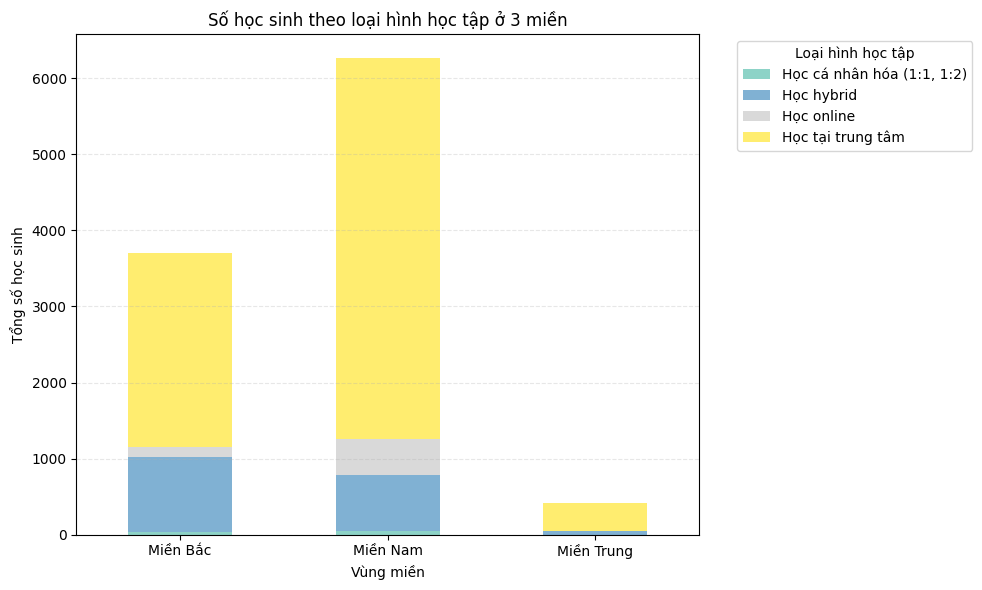

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_excel('k12_class_data.xlsx')
df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)
df['Center'] = df['Center'].astype(str).str.strip().str.upper()
valid_statuses = ['FINISH', 'PENDING', 'OPEN', 'RUNNING']
df_filtered = df[df['Status'].isin(valid_statuses)].copy()

# Hàm phân loại miền
def map_region(center_code):
    name = str(center_code).upper()

    if re.match(r'^ONL-', name):
        return 'Khác'

    north_centers = ['29T1HDT', '25LB', '10TP', 'CTPB', '505MK', '71NCT', '06NHT',
                     '107NPS', '98NVC', 'KĐT VP', 'VHHN', '22CTC', '176DC', '01TP',
                     '04HVT', '70NVC', '1606AHV', '268TNH' , 'HN-ONLINE', 'DArt']
    south_centers = ['672A28PVT', '01TC', '02SH', '223NX', '01QT', 'CTPN', '261-263PXL',
                     '165-167NTT', '01TK', '6183/2', '490 PTB', '120-122PVĐ', '174TL',
                     '322TT', '39HTLO', '343PNL', '99LVV', '414LBB', '624LLQ',
                     '22-24UVK', '205ALHP', '153QTHD', '76NAN', '230ĐLBD',
                     '253PVT', '299LTT', 'HCM-ONLINE', 'DArt']
    other_centers = ['DLLL', '67ĐLLN','255-257HV', 'DArt']

    if name in north_centers:
        return 'Miền Bắc'
    elif name in south_centers:
        return 'Miền Nam'
    elif name in other_centers:
        return 'Miền Trung'
    else:
        return 'Không xác định'

df_filtered['Region'] = df_filtered['Center'].apply(map_region)

# Hàm nhận diện loại hình lớp học
def detect_class_type(name):
    name = str(name).upper()

    if 'ONLINE' in name or 'ONL' in name:
        return 'Học online'
    elif 'HYBRID' in name or 'HB' in name:
        return 'Học hybrid'
    elif '1:1' in name or '1:2' in name or '1:3' in name:
        return 'Học cá nhân hóa (1:1, 1:2)'
    
    match = re.search(r'\(([^)]+)\)', name)
    if match:
        return match.group(1).strip()
    
    return 'Học tại trung tâm'

df_filtered['Class Type'] = df_filtered['Class name'].apply(detect_class_type)
grouped = (
    df_filtered[df_filtered['Region'] != 'Không xác định']
    .groupby(['Region', 'Class Type'])
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
)
pivot = grouped.pivot(index='Region', columns='Class Type', values='total_students').fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Số học sinh theo loại hình học tập ở 3 miền')
plt.xlabel('Vùng miền')
plt.ylabel('Tổng số học sinh')
plt.xticks(rotation=0)
plt.legend(title='Loại hình học tập', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Cả ba miền đều có số học sinh học tại trung tâm nhiều nhất, tiếp theo là học hybrid. Miền Nam có số lượng học sinh học hybrid và học online hoàn toàn cao hơn so với miền Bắc và miền Trung, cho thấy sự thích nghi nhanh với mô hình học kết hợp tại khu vực này. Các lớp cá nhân hóa (1:1, 1:2) vẫn rất ít ở cả ba miền.
</p>

<h2 style="color: #E64A19;"><strong>Kết luận:</strong></h2>
<p>
Qua các biểu đồ trên, có thể thấy học sinh MindX vẫn ưu tiên hình thức học tại trung tâm (offline) truyền thống, tuy nhiên loại hình hybrid (kết hợp online và offline) và học online hoàn toàn đang ngày càng được ưa chuộng, đặc biệt ở miền Nam. Các lớp cá nhân hóa (1:1, 1:2) chỉ chiếm tỷ lệ nhỏ, phù hợp với nhu cầu đặc biệt. Điều này cho thấy MindX nên tiếp tục phát triển mạnh các lớp hybrid và duy trì chất lượng học tại trung tâm, đồng thời từng bước nâng cao trải nghiệm học online để đáp ứng xu hướng chuyển đổi số trong giáo dục.
</p>

<h1 style="color:#FFA726"><strong>Trung tâm đứng đầu theo từng Course Line</strong></h1>

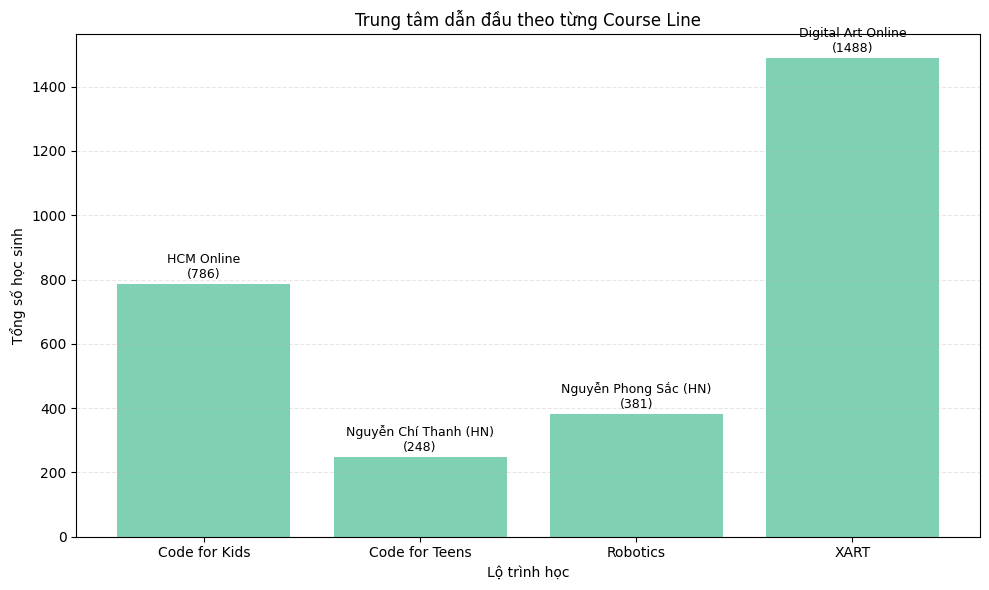

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'k12_class_data.xlsx'
df = pd.read_excel(file_path)
summary = (
    df
    .groupby(['Course Line', 'Center'])
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
)

top_centers = (
    summary
    .sort_values(['Course Line', 'total_students'], ascending=[True, False])
    .drop_duplicates('Course Line')
    .reset_index(drop=True)
)

center_map = {
    '29T1HDT': 'Hoàng Đạo Thuý (HN)',
    '25LB':    'Long Biên (HN)',
    '10TP':    'Trần Phú (HN)',
    '505MK':   'Minh Khai (HN)',
    '71NCT':   'Nguyễn Chí Thanh (HN)',
    '06NHT': 'Nguyễn Hữu Thọ (HN)',
    '107NPS': 'Nguyễn Phong Sắc (HN)',
    '98NVC': 'Nguyễn Văn Cừ (HN)',
    'KĐT VP': 'KĐT Văn Phú (HN)',
    'VHHN': 'Vinhomes Hàm Nghi (HN)',
    '22CTC': 'Thành Công (HN)',
    '176DC': 'Định Công (HN)',
    '672A28PVT': 'Phan Văn Trị (HCM)',
    '01TC': 'Trường Chinh (HCM)',
    '02SH': 'Song Hành (HCM)',
    '223NX': 'Nguyễn Xí (HCM)',
    '01QT': 'Quang Trung (HCM)',
    '261-263PXL': 'Phan Xích Long (HCM)',
    '165-167NTT': 'Nguyễn Thị Thập (HCM)',
    '01TK': 'Tô Ký (HCM)',
    '6183/2': '3 tháng 2 (HCM)',
    '490 PTB': 'Phạm Thái Bường (HCM)',
    '120-122PVĐ': 'Phạm Văn Đồng (HCM)',
    '174TL': 'Tên Lửa (HCM)',
    '322TT': 'Tây Thạnh (HCM)',
    '39HTLO': 'Hải Thượng Lãn Ông (HCM)',
    '343PNL': 'Phạm Ngũ Lão (HCM)',
    '99LVV': 'Lê Văn Việt (HCM)',
    '414LBB': 'Luỹ Bán Bích (HCM)',
    '624LLQ': 'Lạc Long Quân (HCM)',
    '22-24UVK': 'Ung Văn Khiêm (HCM)',
    '205ALHP': 'Vũng Tàu',
    '01TP': 'Vĩnh Phúc',
    'DLLL': 'Thanh Hóa',
    '04HVT': 'Thái Nguyễn',
    '70NVC': 'Quảng Ninh', 
    '1606AHV': 'Phú Thọ',
    '67ĐLLN': 'Nghệ An',
    '268TNH': 'Hải Phòng',
    '253PVT': 'Đồng Nai',
    '255-257HV': 'Đà Nẵng',
    '153QTHD': 'Cần Thơ',
    '76NAN': 'Dĩ An Bình Dương (BD)',
    '230ĐLBD': '230 Đại Lộ Bình Dương (BD)',
    '299LTT': 'Bắc Ninh',
    'CTPB': 'Các tỉnh phía Bắc',
    'CTPN': 'Các tỉnh phía Nam',
    'HCM-Online': 'HCM Online',
    'HN-ONLINE':  'HN Online',
    'DArt':       'Digital Art Online'
}
course_line_map = {
    'AD':   'Art & Design',
    'ROB':  'Robotics',
    'C4K':  'Code for Kids',
    'C4T':  'Code for Teens',
}

top_centers['Center'] = top_centers['Center'].map(center_map).fillna(top_centers['Center'])
top_centers['Course Line'] = top_centers['Course Line'].astype(str).str.strip().str.upper()
top_centers['Course Line'] = top_centers['Course Line'].map(course_line_map).fillna(top_centers['Course Line'])
# df['Course Line'] = df['Course Line'].map(course_line_map).fillna(df['Course Line'])
plt.figure(figsize=(10, 6))
bars = plt.bar(top_centers['Course Line'], top_centers['total_students'], color= '#80d1b3')
plt.xticks(rotation=0)
plt.xlabel('Lộ trình học')
plt.ylabel('Tổng số học sinh')
plt.title('Trung tâm dẫn đầu theo từng Course Line')

for idx, bar in enumerate(bars):
    height = bar.get_height()
    center = top_centers['Center'].iloc[idx]
    label = f'{center}\n({height})'
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, label, ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Mỗi lộ trình học (Course Line) đều có một trung tâm nổi bật dẫn đầu về số lượng học sinh. Các trung tâm lớn ở Hà Nội và TP.HCM thường dẫn đầu ở các lộ trình phổ biến như Code for Kids, Code for Teens, trong khi các trung tâm online cũng có số lượng học sinh lớn ở các lộ trình phù hợp với học trực tuyến.
</p>

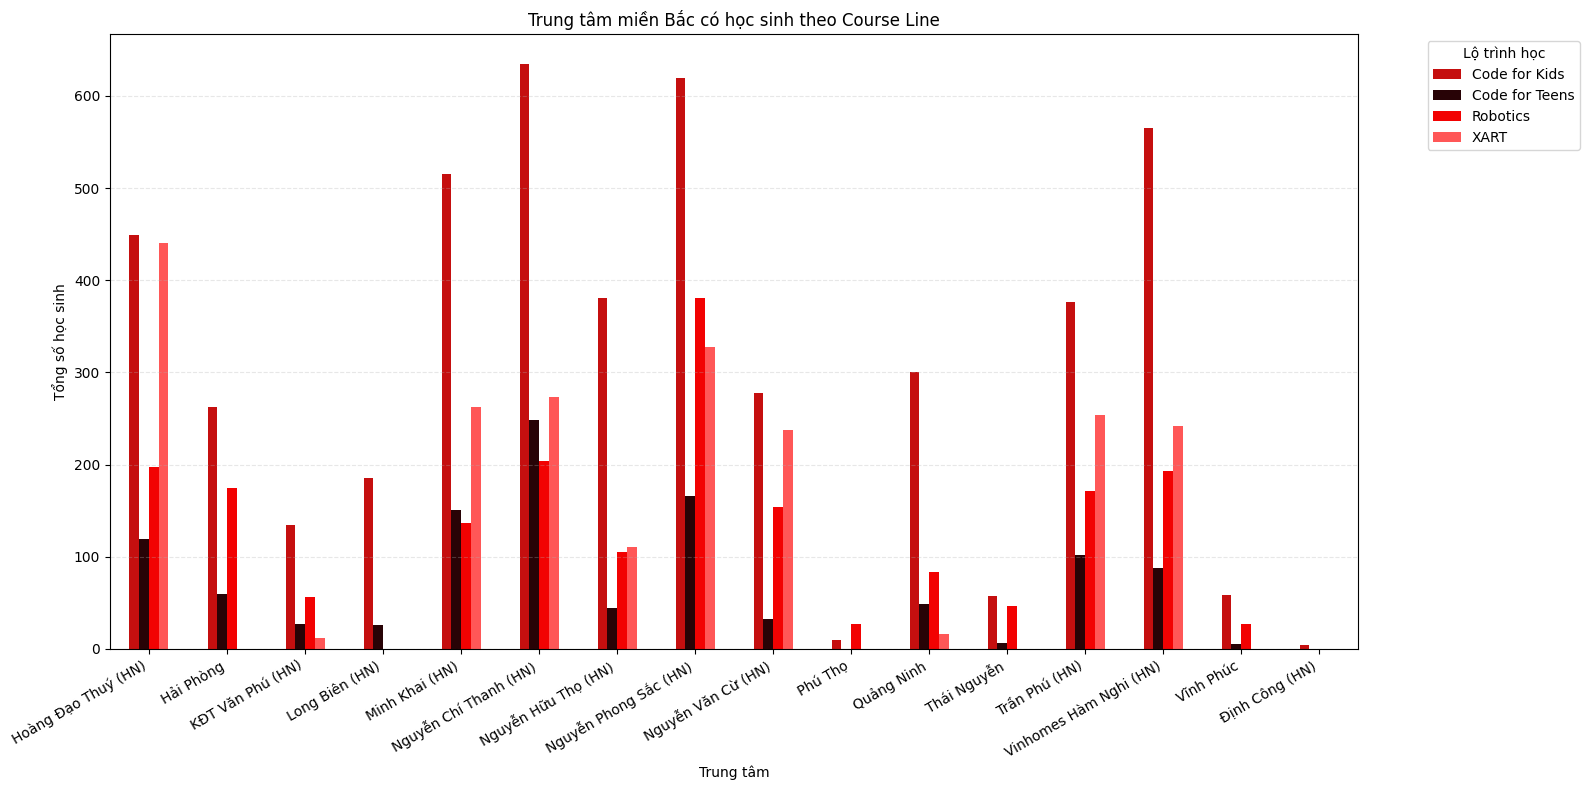

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('k12_class_data.xlsx')
df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)
df['Center'] = df['Center'].astype(str).str.strip().str.upper()

# Áp dụng mapping tên đầy đủ cho Center
center_map = {
    '29T1HDT': 'Hoàng Đạo Thuý (HN)', '25LB': 'Long Biên (HN)', '10TP': 'Trần Phú (HN)', '505MK': 'Minh Khai (HN)',
    '71NCT': 'Nguyễn Chí Thanh (HN)', '06NHT': 'Nguyễn Hữu Thọ (HN)', '107NPS': 'Nguyễn Phong Sắc (HN)',
    '98NVC': 'Nguyễn Văn Cừ (HN)', 'KĐT VP': 'KĐT Văn Phú (HN)', 'VHHN': 'Vinhomes Hàm Nghi (HN)',
    '22CTC': 'Thành Công (HN)', '176DC': 'Định Công (HN)', '01TP': 'Vĩnh Phúc', '04HVT': 'Thái Nguyễn',
    '70NVC': 'Quảng Ninh', '1606AHV': 'Phú Thọ', '268TNH': 'Hải Phòng', '299LTT': 'Bắc Ninh', 'CTPB': 'Các tỉnh phía Bắc',
    'HCM-Online': 'HCM Online', 'HN-ONLINE': 'HN Online', 'DArt': 'Digital Art Online',
}
df['Center Name'] = df['Center'].map(center_map).fillna(df['Center'])
course_line_map = {
    'AD': 'Art & Design', 'ROB': 'Robotics', 'C4K': 'Code for Kids', 'C4T': 'Code for Teens'
}
df['Course Line Name'] = df['Course Line'].map(course_line_map).fillna(df['Course Line'])

# Phân loại miền dùng hàm đã cung cấp
def map_region(center_code):
    name = str(center_code)
    if name in ['29T1HDT', '25LB', '10TP', '505MK', '71NCT', '06NHT', '107NPS', '98NVC',
                'KĐT VP', 'VHHN', '22CTC', '176DC', '01TP', '04HVT', '70NVC', '1606AHV', '268TNH']:
        return 'Miền Bắc'
    elif name in ['672A28PVT', '01TC', '02SH', '223NX', '01QT', 'CTPN', '261-263PXL', '165-167NTT',
                  '01TK', '6183/2', '490 PTB', '120-122PVĐ', '174TL', '322TT', '39HTLO', '343PNL',
                  '99LVV', '414LBB', '624LLQ', '22-24UVK', '205ALHP', '153QTHD', '76NAN',
                  '230ĐLBD', '253PVT', '299LTT']:
        return 'Miền Nam'
    elif name in ['DLLL', '67ĐLLN','255-257HV']:
        return 'Miền Trung'
    elif name in ['HCM-Online', 'DArt', 'HN-ONLINE']:
        return 'Khóa Online'
    else:
        return 'Không xác định'

df['Region'] = df['Center'].apply(map_region)

df_north = df[df['Region'] == 'Miền Bắc']
summary = (
    df_north
    .groupby(['Center Name', 'Course Line Name'])
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
)
center_total = (
    summary
    .groupby('Center Name')
    .agg(grand_total=('total_students', 'sum'))
    .reset_index()
    .sort_values('grand_total', ascending=False)
    .head(30)
)
top_centers = center_total['Center Name']
summary_top = summary[summary['Center Name'].isin(top_centers)]
pivot = summary_top.pivot(index='Center Name', columns='Course Line Name', values='total_students').fillna(0)
pivot.plot(kind='bar', figsize=(16, 8), color=colors)

plt.title('Trung tâm miền Bắc có học sinh theo Course Line')
plt.xlabel('Trung tâm')
plt.ylabel('Tổng số học sinh')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Lộ trình học', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Ở miền Bắc, các trung tâm như Nguyễn Phong Sắc, Nguyễn Chí Thanh, Hoàng Đạo Thuý luôn có số lượng học sinh vượt trội ở hầu hết các lộ trình học. Điều này phản ánh vị trí thuận lợi, uy tín cũng như sự đa dạng về chương trình đào tạo tại các trung tâm này. Các lộ trình như Code for Kids và Code for Teens vẫn chiếm ưu thế về số lượng học sinh.
</p>

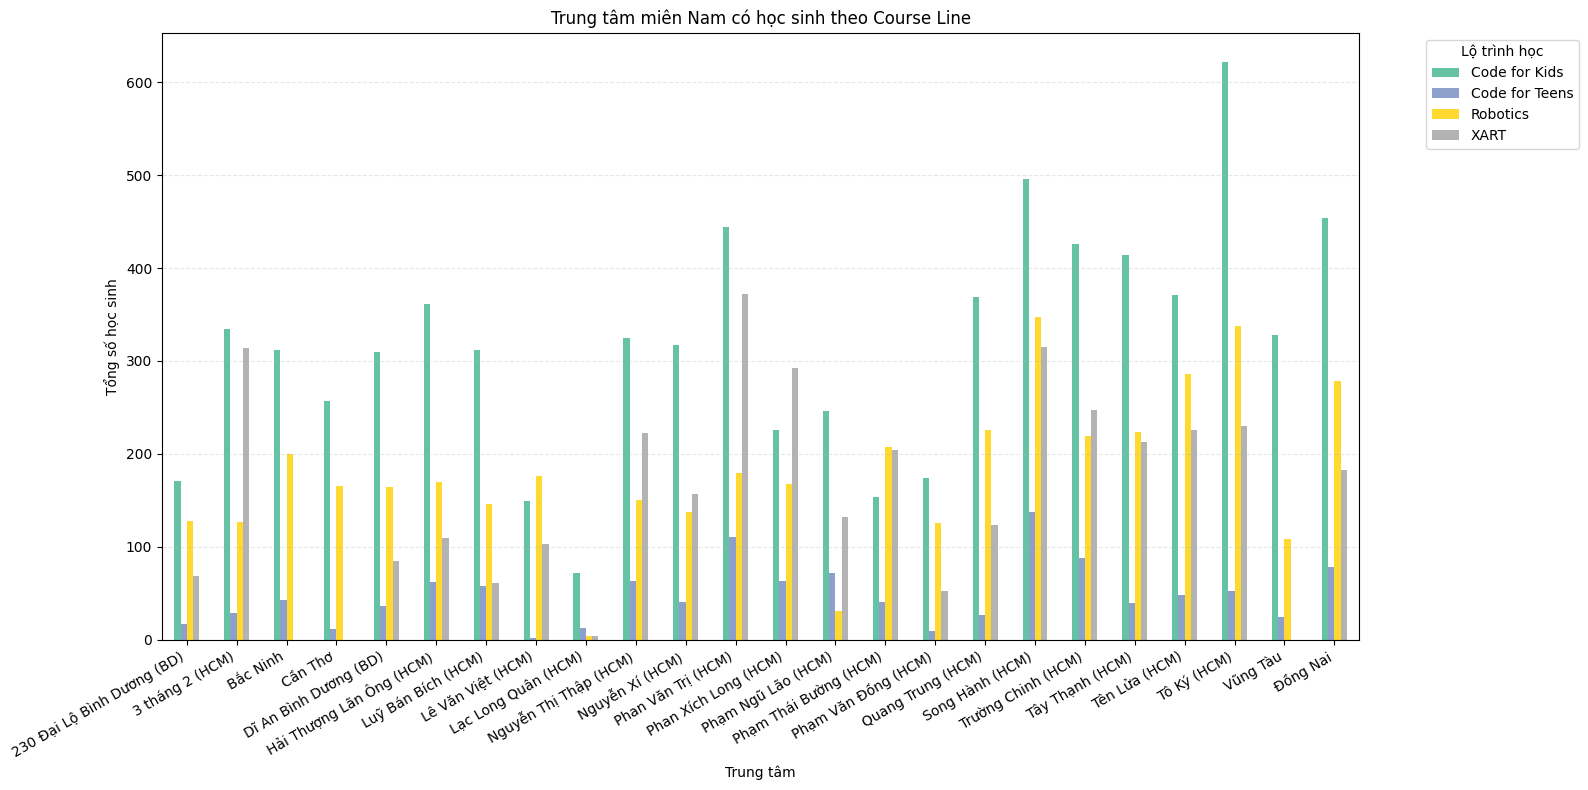

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('k12_class_data.xlsx')
df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)
df['Center'] = df['Center'].astype(str).str.strip().str.upper()

# Áp dụng mapping tên đầy đủ cho Center
center_map = {
    '29T1HDT': 'Hoàng Đạo Thuý (HN)',
    '25LB':    'Long Biên (HN)',
    '10TP':    'Trần Phú (HN)',
    '505MK':   'Minh Khai (HN)',
    '71NCT':   'Nguyễn Chí Thanh (HN)',
    '06NHT': 'Nguyễn Hữu Thọ (HN)',
    '107NPS': 'Nguyễn Phong Sắc (HN)',
    '98NVC': 'Nguyễn Văn Cừ (HN)',
    'KĐT VP': 'KĐT Văn Phú (HN)',
    'VHHN': 'Vinhomes Hàm Nghi (HN)',
    '22CTC': 'Thành Công (HN)',
    '176DC': 'Định Công (HN)',
    '672A28PVT': 'Phan Văn Trị (HCM)',
    '01TC': 'Trường Chinh (HCM)',
    '02SH': 'Song Hành (HCM)',
    '223NX': 'Nguyễn Xí (HCM)',
    '01QT': 'Quang Trung (HCM)',
    '261-263PXL': 'Phan Xích Long (HCM)',
    '165-167NTT': 'Nguyễn Thị Thập (HCM)',
    '01TK': 'Tô Ký (HCM)',
    '6183/2': '3 tháng 2 (HCM)',
    '490 PTB': 'Phạm Thái Bường (HCM)',
    '120-122PVĐ': 'Phạm Văn Đồng (HCM)',
    '174TL': 'Tên Lửa (HCM)',
    '322TT': 'Tây Thạnh (HCM)',
    '39HTLO': 'Hải Thượng Lãn Ông (HCM)',
    '343PNL': 'Phạm Ngũ Lão (HCM)',
    '99LVV': 'Lê Văn Việt (HCM)',
    '414LBB': 'Luỹ Bán Bích (HCM)',
    '624LLQ': 'Lạc Long Quân (HCM)',
    '22-24UVK': 'Ung Văn Khiêm (HCM)',
    '205ALHP': 'Vũng Tàu',
    '01TP': 'Vĩnh Phúc',
    'DLLL': 'Thanh Hóa',
    '04HVT': 'Thái Nguyễn',
    '70NVC': 'Quảng Ninh', 
    '1606AHV': 'Phú Thọ',
    '67ĐLLN': 'Nghệ An',
    '268TNH': 'Hải Phòng',
    '253PVT': 'Đồng Nai',
    '255-257HV': 'Đà Nẵng',
    '153QTHD': 'Cần Thơ',
    '76NAN': 'Dĩ An Bình Dương (BD)',
    '230ĐLBD': '230 Đại Lộ Bình Dương (BD)',
    '299LTT': 'Bắc Ninh',
    'CTPB': 'Các tỉnh phía Bắc',
    'CTPN': 'Các tỉnh phía Nam',
    'HCM-Online': 'HCM Online',
    'HN-ONLINE':  'HN Online',
    'DArt':       'Digital Art Online'
}
df['Center Name'] = df['Center'].map(center_map).fillna(df['Center'])
course_line_map = {
    'AD': 'Art & Design', 'ROB': 'Robotics', 'C4K': 'Code for Kids', 'C4T': 'Code for Teens'
}
df['Course Line Name'] = df['Course Line'].map(course_line_map).fillna(df['Course Line'])

# Phân loại miền dùng hàm đã cung cấp
def map_region(center_code):
    name = str(center_code)
    if name in ['29T1HDT', '25LB', '10TP', '505MK', '71NCT', '06NHT', '107NPS', '98NVC',
                'KĐT VP', 'VHHN', '22CTC', '176DC', '01TP', '04HVT', '70NVC', '1606AHV', '268TNH']:
        return 'Miền Bắc'
    elif name in ['672A28PVT', '01TC', '02SH', '223NX', '01QT', '261-263PXL', '165-167NTT',
                  '01TK', '6183/2', '490 PTB', '120-122PVĐ', '174TL', '322TT', '39HTLO', '343PNL',
                  '99LVV', '414LBB', '624LLQ', '22-24UVK', '205ALHP', '153QTHD', '76NAN',
                  '230ĐLBD', '253PVT', '299LTT']:
        return 'Miền Nam'
    elif name in ['DLLL', '67ĐLLN','255-257HV']:
        return 'Miền Trung'
    elif name in ['HCM-Online', 'DArt', 'HN-ONLINE']:
        return 'Khóa Online'
    else:
        return 'Không xác định'

df['Region'] = df['Center'].apply(map_region)
df_north = df[df['Region'] == 'Miền Nam']
summary = (
    df_north
    .groupby(['Center Name', 'Course Line Name'])
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
)
center_total = (
    summary
    .groupby('Center Name')
    .agg(grand_total=('total_students', 'sum'))
    .reset_index()
    .sort_values('grand_total', ascending=False)
    .head(40)
)

top_centers = center_total['Center Name']
summary_top = summary[summary['Center Name'].isin(top_centers)]
pivot = summary_top.pivot(index='Center Name', columns='Course Line Name', values='total_students').fillna(0)

pivot.plot(kind='bar', figsize=(16, 8), colormap='Set2')

plt.title('Trung tâm miên Nam có học sinh theo Course Line')
plt.xlabel('Trung tâm')
plt.ylabel('Tổng số học sinh')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Lộ trình học', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Ở miền Nam, các trung tâm như Song Hành, Tô Ký, Quang Trung, Phan Văn Trị là những đơn vị dẫn đầu về số lượng học sinh ở nhiều lộ trình học. Đặc biệt, các trung tâm nằm ở khu vực đông dân cư, gần các khu đô thị lớn tại TP.HCM thường có số lượng học sinh nổi bật ở cả Code for Kids và Code for Teens. Điều này cho thấy nhu cầu học lập trình và công nghệ tại miền Nam rất lớn, đồng thời các trung tâm tại đây cũng có sự đa dạng về chương trình đào tạo để đáp ứng nhu cầu của học sinh.
</p>

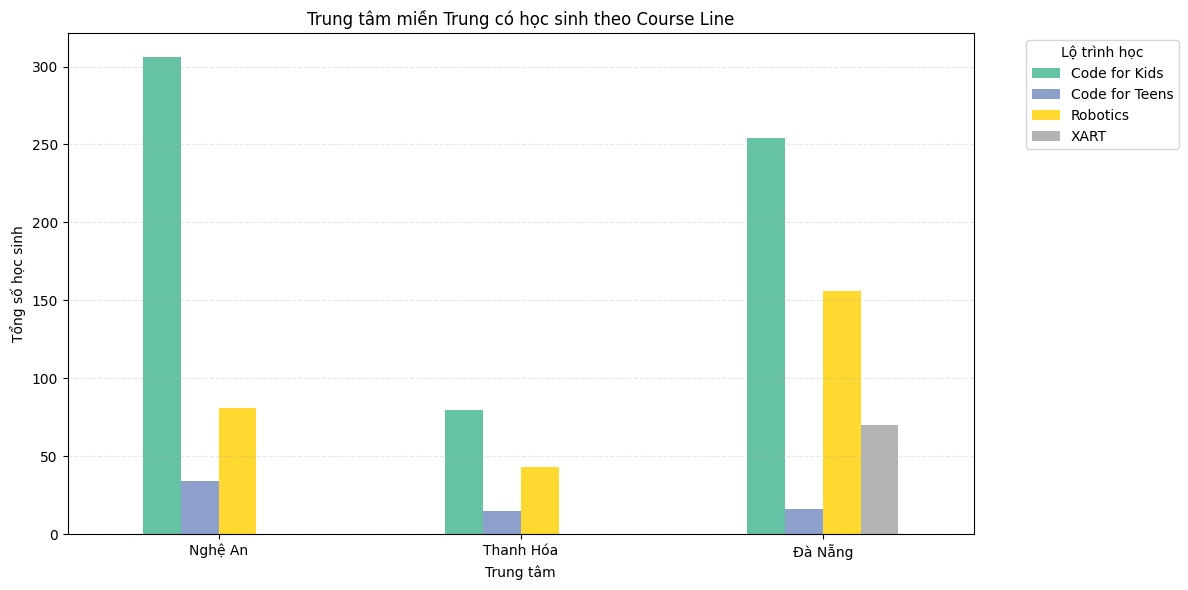

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('k12_class_data.xlsx')
df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)
df['Center'] = df['Center'].astype(str).str.strip().str.upper()

center_map = {
    '29T1HDT': 'Hoàng Đạo Thuý (HN)',
    '25LB':    'Long Biên (HN)',
    '10TP':    'Trần Phú (HN)',
    '505MK':   'Minh Khai (HN)',
    '71NCT':   'Nguyễn Chí Thanh (HN)',
    '06NHT': 'Nguyễn Hữu Thọ (HN)',
    '107NPS': 'Nguyễn Phong Sắc (HN)',
    '98NVC': 'Nguyễn Văn Cừ (HN)',
    'KĐT VP': 'KĐT Văn Phú (HN)',
    'VHHN': 'Vinhomes Hàm Nghi (HN)',
    '22CTC': 'Thành Công (HN)',
    '176DC': 'Định Công (HN)',
    '672A28PVT': 'Phan Văn Trị (HCM)',
    '01TC': 'Trường Chinh (HCM)',
    '02SH': 'Song Hành (HCM)',
    '223NX': 'Nguyễn Xí (HCM)',
    '01QT': 'Quang Trung (HCM)',
    '261-263PXL': 'Phan Xích Long (HCM)',
    '165-167NTT': 'Nguyễn Thị Thập (HCM)',
    '01TK': 'Tô Ký (HCM)',
    '6183/2': '3 tháng 2 (HCM)',
    '490 PTB': 'Phạm Thái Bường (HCM)',
    '120-122PVĐ': 'Phạm Văn Đồng (HCM)',
    '174TL': 'Tên Lửa (HCM)',
    '322TT': 'Tây Thạnh (HCM)',
    '39HTLO': 'Hải Thượng Lãn Ông (HCM)',
    '343PNL': 'Phạm Ngũ Lão (HCM)',
    '99LVV': 'Lê Văn Việt (HCM)',
    '414LBB': 'Luỹ Bán Bích (HCM)',
    '624LLQ': 'Lạc Long Quân (HCM)',
    '22-24UVK': 'Ung Văn Khiêm (HCM)',
    '205ALHP': 'Vũng Tàu',
    '01TP': 'Vĩnh Phúc',
    'DLLL': 'Thanh Hóa',
    '04HVT': 'Thái Nguyễn',
    '70NVC': 'Quảng Ninh', 
    '1606AHV': 'Phú Thọ',
    '67ĐLLN': 'Nghệ An',
    '268TNH': 'Hải Phòng',
    '253PVT': 'Đồng Nai',
    '255-257HV': 'Đà Nẵng',
    '153QTHD': 'Cần Thơ',
    '76NAN': 'Dĩ An Bình Dương (BD)',
    '230ĐLBD': '230 Đại Lộ Bình Dương (BD)',
    '299LTT': 'Bắc Ninh',
    'CTPB': 'Các tỉnh phía Bắc',
    'CTPN': 'Các tỉnh phía Nam',
    'HCM-Online': 'HCM Online',
    'HN-ONLINE':  'HN Online',
    'DArt':       'Digital Art Online'
}
df['Center Name'] = df['Center'].map(center_map).fillna(df['Center'])
course_line_map = {
    'AD': 'Art & Design', 'ROB': 'Robotics', 'C4K': 'Code for Kids', 'C4T': 'Code for Teens'
}
df['Course Line Name'] = df['Course Line'].map(course_line_map).fillna(df['Course Line'])

# Phân loại miền dùng hàm đã cung cấp
def map_region(center_code):
    name = str(center_code)
    if name in ['29T1HDT', '25LB', '10TP', '505MK', '71NCT', '06NHT', '107NPS', '98NVC',
                'KĐT VP', 'VHHN', '22CTC', '176DC', '01TP', '04HVT', '70NVC', '1606AHV', '268TNH']:
        return 'Miền Bắc'
    elif name in ['672A28PVT', '01TC', '02SH', '223NX', '01QT', '261-263PXL', '165-167NTT',
                  '01TK', '6183/2', '490 PTB', '120-122PVĐ', '174TL', '322TT', '39HTLO', '343PNL',
                  '99LVV', '414LBB', '624LLQ', '22-24UVK', '205ALHP', '153QTHD', '76NAN',
                  '230ĐLBD', '253PVT', '299LTT']:
        return 'Miền Nam'
    elif name in ['DLLL', '67ĐLLN','255-257HV']:
        return 'Miền Trung'
    elif name in ['HCM-Online', 'DArt', 'HN-ONLINE']:
        return 'Khóa Online'
    else:
        return 'Không xác định'

df['Region'] = df['Center'].apply(map_region)
df_north = df[df['Region'] == 'Miền Trung']
summary = (
    df_north
    .groupby(['Center Name', 'Course Line Name'])
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
)
center_total = (
    summary
    .groupby('Center Name')
    .agg(grand_total=('total_students', 'sum'))
    .reset_index()
    .sort_values('grand_total', ascending=False)
    .head(40)
)

top_centers = center_total['Center Name']
summary_top = summary[summary['Center Name'].isin(top_centers)]
pivot = summary_top.pivot(index='Center Name', columns='Course Line Name', values='total_students').fillna(0)
pivot.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title('Trung tâm miền Trung có học sinh theo Course Line')
plt.xlabel('Trung tâm')
plt.ylabel('Tổng số học sinh')
plt.xticks(rotation=0)
plt.legend(title='Lộ trình học', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Ở miền Trung, số lượng trung tâm và học sinh không nhiều như hai miền còn lại, tuy nhiên các trung tâm lớn như Đà Nẵng, Nghệ An vẫn có số lượng học sinh nổi bật ở các lộ trình Code for Kids và Code for Teens. Điều này cho thấy tiềm năng phát triển của các trung tâm tại khu vực này trong tương lai.
</p>

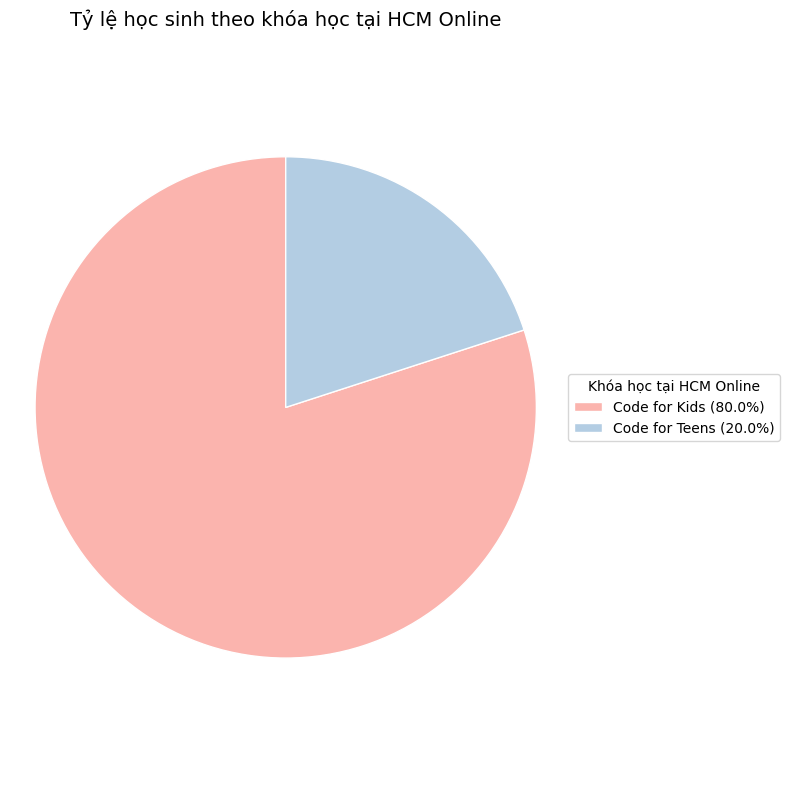

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('k12_class_data.xlsx')
df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)
df['Center'] = df['Center'].astype(str).str.strip().str.upper()
df['Course Line'] = df['Course Line'].astype(str).str.strip().str.upper()

df_hcm_online = df[df['Center'] == 'HCM-ONLINE']
df_hcm_online = df_hcm_online[df_hcm_online['Status'].isin(['FINISH', 'PENDING', 'OPEN', 'RUNNING'])]

# Mapping tên Course Line
course_line_map = {
    'AD': 'Art & Design',
    'ROB': 'Robotics',
    'C4K': 'Code for Kids',
    'C4T': 'Code for Teens',
}
df_hcm_online['Course Line'] = df_hcm_online['Course Line'].map(course_line_map).fillna(df_hcm_online['Course Line'])
summary = (
    df_hcm_online
    .groupby('Course Line')
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
    .sort_values('total_students', ascending=False)
)
percent = (summary['total_students'] / summary['total_students'].sum() * 100).round(1)
labels = [f'{name} ({p}%)' for name, p in zip(summary['Course Line'], percent)]
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Pastel2.colors

wedges, _ = ax.pie(
    summary['total_students'],
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

ax.legend(
    wedges,
    labels,
    title='Khóa học tại HCM Online',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

ax.set_title('Tỷ lệ học sinh theo khóa học tại HCM Online', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


<h3 style="color: #2ECC71;"><strong>Nhận xét:</strong></h3>
<p>
Các khóa học online tại HCM Online thu hút đông học sinh ở các lộ trình phổ biến, đặc biệt là Code for Kids và Code for Teens. Trong khi đó, các khóa học Robot chưa được triển khai online có thể do sự thiếu hụt về công cụ học tập so với học trực tiếp tại trung tâm.
</p>

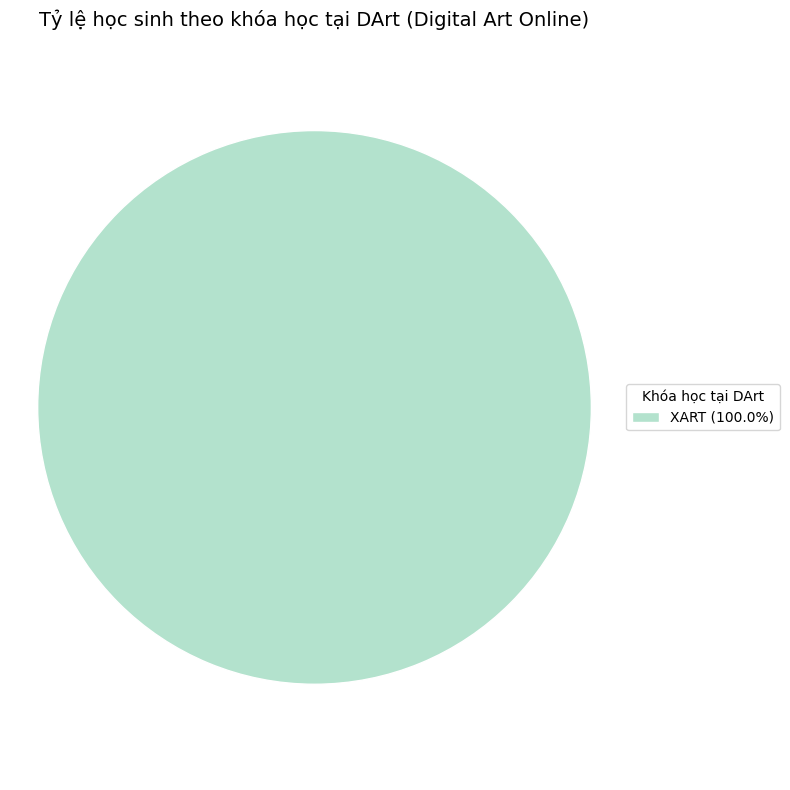

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('k12_class_data.xlsx')

df['Status'] = df['Status'].astype(str).str.upper()
df['Student count'] = pd.to_numeric(df['Student count'], errors='coerce').fillna(0).astype(int)
df['Center'] = df['Center'].astype(str).str.strip().str.upper()
df['Course Line'] = df['Course Line'].astype(str).str.strip().str.upper()
df_dart = df[df['Center'] == 'DART']
df_dart = df_dart[df_dart['Status'].isin(['FINISH', 'PENDING', 'OPEN', 'RUNNING'])]
course_line_map = {
    'AD': 'Art & Design',
    'ROB': 'Robotics',
    'C4K': 'Code for Kids',
    'C4T': 'Code for Teens',
}
df_dart['Course Line Name'] = df_dart['Course Line'].map(course_line_map).fillna(df_dart['Course Line'])

summary = (
    df_dart
    .groupby('Course Line Name')
    .agg(total_students=('Student count', 'sum'))
    .reset_index()
    .sort_values('total_students', ascending=False)
)

percent = (summary['total_students'] / summary['total_students'].sum() * 100).round(1)
labels = [f'{name} ({p}%)' for name, p in zip(summary['Course Line Name'], percent)]

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Pastel2.colors

wedges, _ = ax.pie(
    summary['total_students'],
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

ax.legend(
    wedges,
    labels,
    title='Khóa học tại DArt',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

ax.set_title('Tỷ lệ học sinh theo khóa học tại DArt (Digital Art Online)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


<h2 style="color: #E64A19;"><strong>Kết luận:</strong></h2>
<p>
Qua phân tích số liệu theo từng lộ trình học (Course Line) ở các khu vực, có thể thấy mỗi khu vực đều có những trung tâm nổi bật dẫn đầu về số lượng học sinh ở từng lộ trình. Các trung tâm lớn tại Hà Nội và TP.HCM thường chiếm ưu thế ở các lộ trình phổ biến như Code for Kids và Code for Teens, trong khi các trung tâm online cũng thu hút đông học sinh ở các lộ trình phù hợp với hình thức học trực tuyến. Điều này cho thấy sự đa dạng về nhu cầu học tập cũng như thế mạnh riêng của từng trung tâm, đồng thời gợi ý rằng việc phát triển các chương trình đào tạo phù hợp với từng khu vực và hình thức học sẽ giúp tối ưu hóa số lượng học sinh cho từng trung tâm.
</p>


<h2><strong>Dự đoán xu hướng số lượng học sinh:</strong></h2>

<ul>
  <li><b>1. Theo vị trí địa lý:</b>
    <br>
    <i>Dự đoán:</i> Miền Nam và các trung tâm online sẽ tiếp tục dẫn đầu về số lượng học sinh nhờ sự tiện lợi và nhu cầu học công nghệ cao. Miền Trung sẽ tăng trưởng mạnh nếu được đầu tư quảng bá và mở rộng chương trình học phù hợp.
        <br>
    <i>Dự đoán:</i> Các trung tâm ở khu vực đông dân cư, gần trường học lớn hoặc khu đô thị sẽ tiếp tục có số lượng học sinh cao. Các trung tâm mới mở ở miền Trung, miền Bắc sẽ tăng trưởng nếu có chính sách ưu đãi và truyền thông mạnh.
  </li>
  <li><b>2. Theo loại hình học tập:</b>
    <br>
    <i>Dự đoán:</i> Học tại trung tâm vẫn chiếm ưu thế, nhưng tỷ lệ học hybrid sẽ tăng nhanh trong 1-2 năm tới do phụ huynh và học sinh ngày càng ưa chuộng sự linh hoạt. Học online hoàn toàn sẽ tăng trưởng chậm hơn, chủ yếu ở các khu vực không có trung tâm.
  </li>
  <li><b>3. Theo từng Course Line:</b>
    <br>
    <i>Dự đoán:</i> Các lộ trình Code for Kids và Code for Teens vẫn sẽ là lựa chọn phổ biến nhất. Các khóa học về Robotics và Art & Design sẽ tăng trưởng tốt ở các trung tâm lớn và online nếu được đầu tư về giáo trình và thiết bị.
  </li>
</ul>

<p>
<strong>=></strong> Nếu MindX tập trung phát triển các lớp hybrid, đầu tư vào miền Trung và nâng cao trải nghiệm học online, số lượng học sinh sẽ tăng đều ở các khu vực và loại hình học tập, giúp cân bằng hơn giữa các trung tâm.

<h2><strong>Làm sao để tăng số lượng học sinh ở các trung tâm?</strong></h2>
<p>
Để tăng số lượng học sinh, MindX cần kết hợp các giải pháp trên: nâng cao chất lượng đào tạo, đa dạng hóa chương trình học, tăng cường truyền thông, mở rộng hợp tác với trường học, phát triển mạnh hình thức học online/hybrid và áp dụng chính sách ưu đãi phù hợp với từng khu vực. Đồng thời, thường xuyên khảo sát nhu cầu và phản hồi của phụ huynh, học sinh để điều chỉnh chiến lược phát triển cho từng trung tâm.
</p>

C:\Users\nmduc\AppData\Local\Temp\ipykernel_10124\1724945407.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Course Line', y='predicted_total_students', palette='viridis')
C:\Users\nmduc\AppData\Local\Temp\ipykernel_10124\1724945407.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=summary, x='Course Line', y='predicted_total_students', palette='viridis')


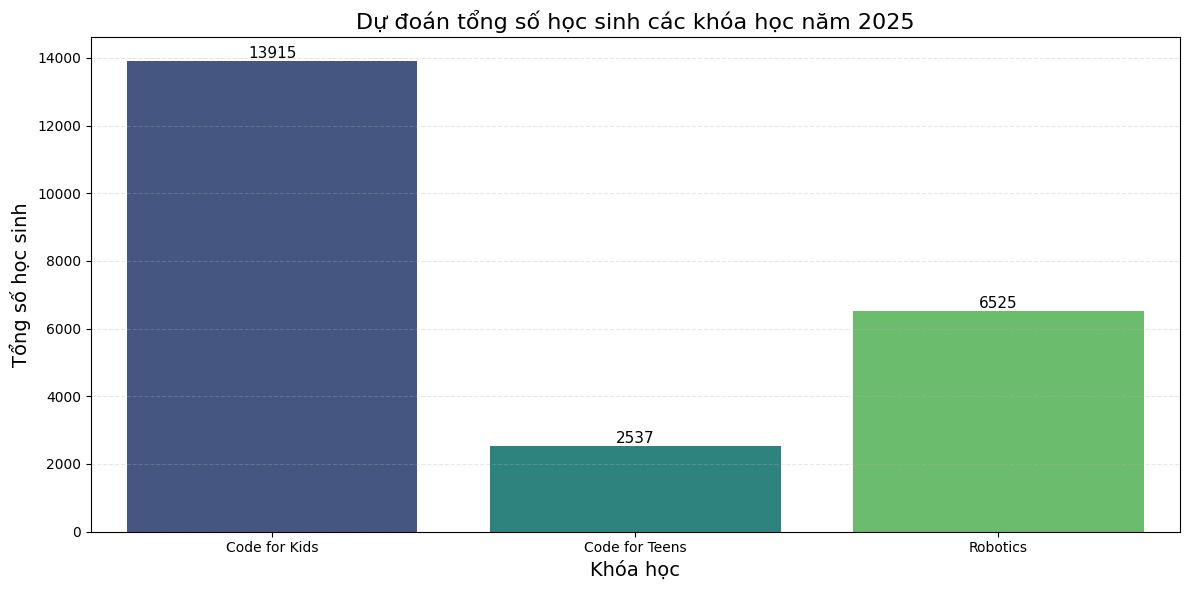

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_excel('mindx_student_count_prediction_2025.xlsx')
course_line_map = {
    'AD':   'Art & Design',
    'ROB':  'Robotics',
    'C4K':  'Code for Kids',
    'C4T':  'Code for Teens',
}
df['Course Line'] = df['Course Line'].map(course_line_map)
# Kiểm tra cột cần thiết
if 'Course Line' not in df.columns or 'predicted_total_students' not in df.columns:
    raise ValueError("File cần có cột 'Course Line' và 'predicted_total_students'.")

# Tổng hợp nếu có nhiều dòng cùng khóa học
summary = df.groupby('Course Line')['predicted_total_students'].sum().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='Course Line', y='predicted_total_students', palette='viridis')

plt.title('Dự đoán tổng số học sinh các khóa học năm 2025', fontsize=16)
plt.xlabel('Khóa học', fontsize=14)
plt.ylabel('Tổng số học sinh', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
ax = sns.barplot(data=summary, x='Course Line', y='predicted_total_students', palette='viridis')
for i, row in summary.iterrows():
    ax.text(i, row['predicted_total_students'] + 1, f"{row['predicted_total_students']}", ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.show()
